In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import re

In [31]:
df = pd.read_json('data/data.json')

In [21]:
# df=df.fillna('na')

In [40]:
df.columns

Index(['genre', 'imdb_url', 'plot', 'rating', 'runtime', 'title', 'votes',
       'year', 'ratingRange'],
      dtype='object')

In [41]:
df = df[['genre', 'rating', 'runtime', 'title', 'votes',
       'year','ratingRange']]

## rating category

In [52]:
bins = [0, 5, 7, 10]
names = ['low', 'average', 'high']

df['ratingRange'] = pd.cut(df['rating'], bins, labels=names)

### runtime category

In [51]:
bins = [0, 60, 120, 200]
names = ['<60', '60-120', '>120mins']

df['runtimeRange'] = pd.cut(df['runtime'], bins, labels=names)

In [46]:
df = pd.read_csv('movie_review.csv')

In [57]:
df.votes.value_counts()

7.0      27
5.0      24
6.0      21
8.0      18
9.0      13
19.0      8
10.0      8
12.0      8
17.0      7
16.0      6
18.0      5
23.0      5
11.0      4
26.0      4
25.0      4
31.0      4
24.0      4
13.0      4
21.0      4
52.0      3
27.0      3
20.0      3
14.0      3
22.0      3
37.0      3
194.0     2
66.0      2
29.0      2
30.0      2
38.0      2
         ..
157.0     1
253.0     1
426.0     1
153.0     1
159.0     1
137.0     1
434.0     1
466.0     1
746.0     1
249.0     1
650.0     1
397.0     1
72.0      1
61.0      1
58.0      1
88.0      1
47.0      1
78.0      1
35.0      1
59.0      1
42.0      1
15.0      1
65.0      1
39.0      1
41.0      1
54.0      1
34.0      1
343.0     1
28.0      1
290.0     1
Name: votes, Length: 78, dtype: int64

In [53]:
df.to_csv('movie_review.csv',index=False)

### Genre Analysis

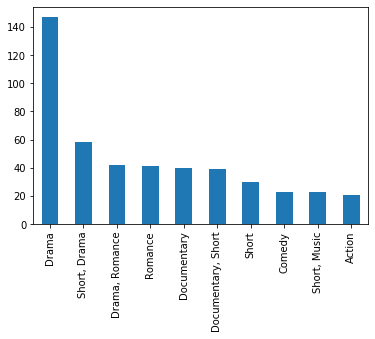

In [6]:
df['genre'].value_counts().nlargest(10).plot(kind='bar')

In [7]:

genre_list = ['drama', 'romance', 'comedy', 'biography', 'documentary', 'crime', 'thriller', 'action', 'music']

In [9]:
count_map = {}
for genre in genre_list:
    count_map[genre] = len(df['genre'].dropna().apply(lambda x : genre if genre in x.lower() else None).dropna())

In [13]:
types = np.array(list(count_map.keys()))

counts = np.array(list(count_map.values()))

Text(0.5, 1.0, 'Nepali Movie Genre')

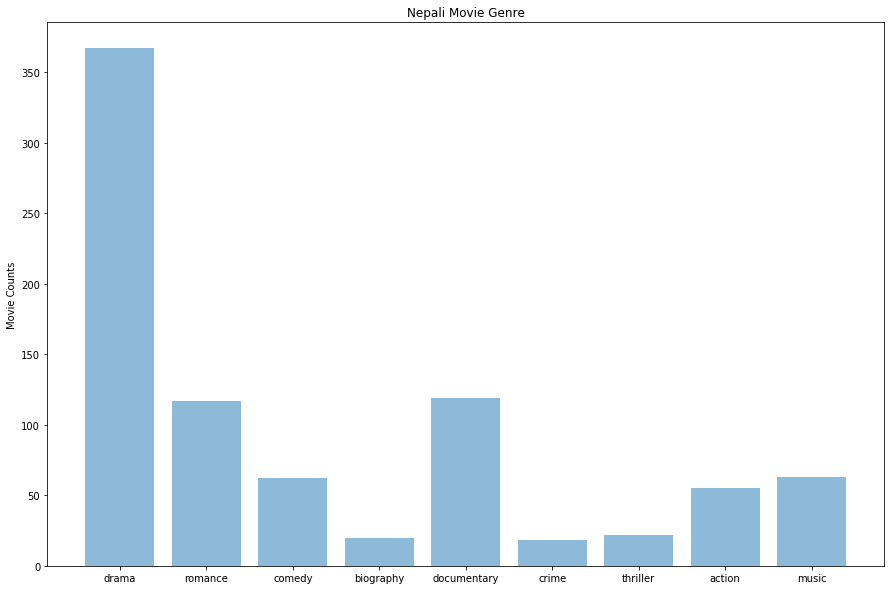

In [15]:

figsize = plt.rcParams['figure.figsize']
plt.rcParams['figure.figsize'] = [15, 10]
y_pos = np.arange(len(types))
plt.bar(y_pos, counts, align='center', alpha=0.5)
plt.xticks(y_pos, types)
plt.ylabel('Movie Counts')
plt.title('Nepali Movie Genre')